In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import torch
import keras
from keras import layers
from keras import models
from keras import optimizers

In [23]:
X = np.load('classification_problem.npy')

In [24]:
X = pd.DataFrame(X)
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,983.990540,942.286499,661.727966,943.103271,862.790222,105.079277,-4.460563,899.619080,198.236786,372.159210,721.331665,573.659851
1,977.899475,943.009949,660.280029,953.870422,865.226379,106.982498,1.351808,903.402222,204.626221,358.535583,717.090576,515.002991
2,997.377319,943.708069,663.513123,929.276184,861.283142,113.385300,9.707563,906.708252,204.998215,349.990387,668.513977,501.894470
3,1001.554688,944.264709,650.176453,909.029968,861.296997,110.551079,-5.713619,911.538940,203.693878,349.119629,724.664612,571.145813
4,1007.083252,943.864685,662.991455,931.140503,858.884033,108.564102,-6.160424,903.476929,195.064453,367.321808,680.104126,540.926025


In [25]:
y = np.full(1000, 0)
y = np.append(y, np.full(1000, 1))
y = np.append(y, np.full(1000, 2))

In [26]:
y = pd.get_dummies(y, prefix='class')
y

,class_0,class_1,class_2
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
2995,0,0,1
2996,0,0,1
2997,0,0,1
2998,0,0,1


In [86]:
X_train = torch.tensor(X.values)
y_train = torch.tensor(y.values, dtype=torch.float32)

In [88]:
y_train

tensor([[1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        ...,
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.]])

In [89]:
model = torch.nn.Sequential(#torch.nn.BatchNorm1d(12),
                            torch.nn.Linear(len(X_train[0]), 128),
                            torch.nn.ReLU(),
                            torch.nn.Dropout(0.3),
                            torch.nn.Linear(128, 64),
                            torch.nn.ReLU(),
                            torch.nn.Dropout(0.3),
                            torch.nn.Linear(64, 3))

In [90]:
dataset = torch.utils.data.TensorDataset(X_train, y_train)

In [91]:
X_train

tensor([[ 983.9905,  942.2865,  661.7280,  ...,  372.1592,  721.3317,
          573.6599],
        [ 977.8995,  943.0099,  660.2800,  ...,  358.5356,  717.0906,
          515.0030],
        [ 997.3773,  943.7081,  663.5131,  ...,  349.9904,  668.5140,
          501.8945],
        ...,
        [1053.4028,  943.9031,  654.8272,  ...,  353.9153,  699.5015,
          514.1923],
        [1055.4299,  942.1505,  660.3907,  ...,  356.5106,  706.0399,
          562.4285],
        [1023.4271,  940.5696,  663.1633,  ...,  349.6646,  737.8727,
          586.1558]])

In [92]:
loader = torch.utils.data.DataLoader(dataset, batch_size=32)

In [93]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [94]:
loss_func = torch.nn.MSELoss()

In [107]:
for epoch in range(100):    
    for features, target in loader:
        optimizer.zero_grad()
        pred = model(features)
        loss = loss_func(pred, target)
        loss.backward()
        optimizer.step()
    if epoch%10 == 0:
        print(f'epoch {epoch}, loss = {loss.item()}, accuracy = {acc}')

epoch 0, loss = 0.2154420167207718, accuracy = <function acc at 0x000001D76DA47550>
epoch 10, loss = 0.21493521332740784, accuracy = <function acc at 0x000001D76DA47550>
epoch 20, loss = 0.21489004790782928, accuracy = <function acc at 0x000001D76DA47550>
epoch 30, loss = 0.21514523029327393, accuracy = <function acc at 0x000001D76DA47550>
epoch 40, loss = 0.215092733502388, accuracy = <function acc at 0x000001D76DA47550>
epoch 50, loss = 0.2150181084871292, accuracy = <function acc at 0x000001D76DA47550>
epoch 60, loss = 0.21493878960609436, accuracy = <function acc at 0x000001D76DA47550>
epoch 70, loss = 0.21504081785678864, accuracy = <function acc at 0x000001D76DA47550>
epoch 80, loss = 0.21500545740127563, accuracy = <function acc at 0x000001D76DA47550>
epoch 90, loss = 0.214967280626297, accuracy = <function acc at 0x000001D76DA47550>


In [88]:
# Model
model = models.Sequential()

model.add(layers.BatchNormalization())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.3))

model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.3))

model.add(layers.Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=optimizers.Adam(lr=0.001),
             metrics=['accuracy'])

In [89]:
batch_size = 32
epochs = 100

model_history  = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, 
                           validation_data=(X_val, y_val))

Epoch 1/100
75/75 [==============================] - 0s 4ms/step - loss: 0.8903 - accuracy: 0.5612 - val_loss: 53.8857 - val_accuracy: 0.3217
Epoch 2/100
75/75 [==============================] - 0s 1ms/step - loss: 0.7740 - accuracy: 0.6371 - val_loss: 41.2410 - val_accuracy: 0.3267
Epoch 3/100
75/75 [==============================] - 0s 1ms/step - loss: 0.7380 - accuracy: 0.6467 - val_loss: 29.7427 - val_accuracy: 0.3267
Epoch 4/100
75/75 [==============================] - 0s 2ms/step - loss: 0.7216 - accuracy: 0.6700 - val_loss: 13.6758 - val_accuracy: 0.3267
Epoch 5/100
75/75 [==============================] - 0s 1ms/step - loss: 0.7103 - accuracy: 0.6671 - val_loss: 7.8081 - val_accuracy: 0.3267
Epoch 6/100
75/75 [==============================] - 0s 1ms/step - loss: 0.6944 - accuracy: 0.6746 - val_loss: 3.8483 - val_accuracy: 0.3300
Epoch 7/100
75/75 [==============================] - 0s 1ms/step - loss: 0.7069 - accuracy: 0.6771 - val_loss: 1.5986 - val_accuracy: 0.4167
Epoch 8/1

Epoch 59/100
75/75 [==============================] - 0s 1ms/step - loss: 0.6316 - accuracy: 0.7117 - val_loss: 0.6212 - val_accuracy: 0.7083
Epoch 60/100
75/75 [==============================] - 0s 1ms/step - loss: 0.6293 - accuracy: 0.7104 - val_loss: 0.6105 - val_accuracy: 0.6983
Epoch 61/100
75/75 [==============================] - 0s 1ms/step - loss: 0.6166 - accuracy: 0.7192 - val_loss: 0.6090 - val_accuracy: 0.7033
Epoch 62/100
75/75 [==============================] - 0s 1ms/step - loss: 0.6119 - accuracy: 0.7271 - val_loss: 0.6065 - val_accuracy: 0.7083
Epoch 63/100
75/75 [==============================] - 0s 1ms/step - loss: 0.6220 - accuracy: 0.7171 - val_loss: 0.6058 - val_accuracy: 0.7050
Epoch 64/100
75/75 [==============================] - 0s 2ms/step - loss: 0.6205 - accuracy: 0.7192 - val_loss: 0.6127 - val_accuracy: 0.7017
Epoch 65/100
75/75 [==============================] - 0s 2ms/step - loss: 0.6223 - accuracy: 0.7262 - val_loss: 0.6083 - val_accuracy: 0.7000
Epoch 

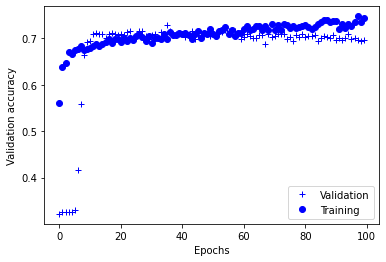

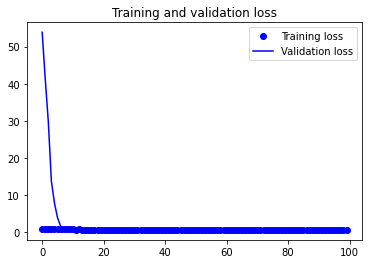

In [90]:
epochs = range(0, epochs)

train_accuracy = model_history.history['accuracy']
val_accuracy= model_history.history['val_accuracy']
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

plt.plot(epochs, val_accuracy, 'b+', label='Validation')
plt.plot(epochs, train_accuracy, 'bo', label='Training')
plt.xlabel('Epochs')
plt.ylabel('Validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [91]:
model.save('3class.h5')